# Predicting House Prices

#### This notebook is going to be focused on solving the problem of predicting house prices for house buyers and house sellers.

#### A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.

#### We are going to take advantage of all of the feature variables available to use and use it to analyze and predict house prices.

## Import the Required Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
housing = pd.read_csv('housing data.csv')

In [3]:
housing.shape

(1418, 13)

In [4]:
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


## Lets check the data type

In [5]:
housing.dtypes

Id              int64
OverallQual     int64
YearBuilt       int64
TotalBsmtSF     int64
Electrical     object
GrLivArea       int64
FullBath        int64
GarageType     object
GarageCars      int64
GarageArea      int64
Fence          object
MiscFeature    object
SalePrice       int64
dtype: object

In [6]:
housing.count()

## summary of data

Id             1418
OverallQual    1418
YearBuilt      1418
TotalBsmtSF    1418
Electrical     1417
GrLivArea      1418
FullBath       1418
GarageType     1275
GarageCars     1418
GarageArea     1418
Fence           270
MiscFeature      52
SalePrice      1418
dtype: int64

## Let's check the summary of data

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


In [8]:
housing.describe()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,709.500000,6.114245,1971.600846,1061.712271,1519.645275,1.565585,1.763752,472.617772,182089.485896
std,409.485653,1.385858,30.064293,437.277589,527.412584,0.551127,0.755995,216.068677,79970.934085
min,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,355.250000,5.000000,1954.000000,796.500000,1132.500000,1.000000,1.000000,324.250000,130000.000000
50%,709.500000,6.000000,1973.000000,994.000000,1468.500000,2.000000,2.000000,478.000000,164800.000000
75%,1063.750000,7.000000,2001.000000,1303.500000,1786.000000,2.000000,2.000000,576.000000,215000.000000
max,1418.000000,10.000000,2010.000000,6110.000000,5642.000000,3.000000,4.000000,1418.000000,755000.000000


## Total Unique Value

In [9]:
## gives only unique values 

housing.nunique()

Id             1418
OverallQual      10
YearBuilt       110
TotalBsmtSF     717
Electrical        5
GrLivArea       854
FullBath          4
GarageType        6
GarageCars        5
GarageArea      440
Fence             4
MiscFeature       4
SalePrice       653
dtype: int64

## Missing Value

In [10]:
# missing data

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

missing_data.head(20)

,Total,Percent(%)
MiscFeature,1366,96.332863
Fence,1148,80.959097
GarageType,143,10.084626
Electrical,1,0.070522
Id,0,0.000000
OverallQual,0,0.000000
YearBuilt,0,0.000000
TotalBsmtSF,0,0.000000
GrLivArea,0,0.000000
FullBath,0,0.000000


* MiscFeature have max missing value 96%


* Fence also have 80.9% missing value.


* Garagetype have 10% missing value.


* Electrical have only 1 missing value.

## Data Visualization

<AxesSubplot:>

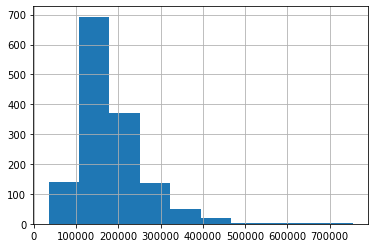

In [11]:
# Histogram 

housing['SalePrice'].hist()

Text(0, 0.5, 'Density')

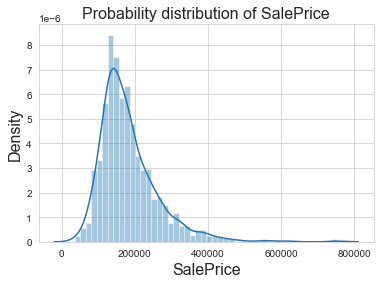

In [12]:
sns.set_style("whitegrid")
sns.distplot(housing['SalePrice'])
plt.title("Probability distribution of SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=16)
plt.ylabel("Density", fontsize=16)

* Most of the density lies between 100k and 250k, but there appears to be a lot of outliers on the pricier side.

<AxesSubplot:xlabel='SalePrice'>

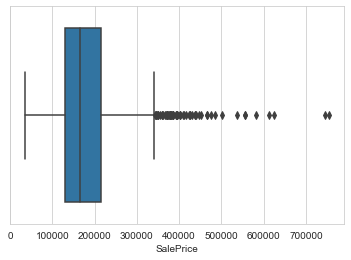

In [13]:
sns.boxplot(housing['SalePrice'])

Text(0, 0.5, 'SalePrice')

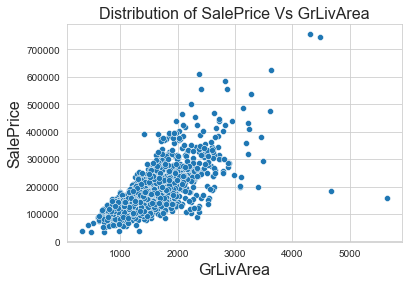

In [14]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = housing)
plt.title("Distribution of SalePrice Vs GrLivArea", fontsize=16)
plt.xlabel("GrLivArea", fontsize=16)
plt.ylabel("SalePrice", fontsize=16)

* It might’ve expected that larger living area should mean a higher price. 


* But what are those 2–3 “cheap” houses offering huge living area?

Text(0, 0.5, 'SalePrice')

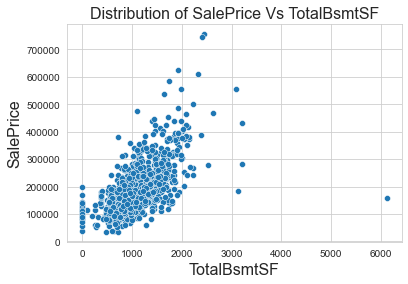

In [15]:
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = housing)
plt.title("Distribution of SalePrice Vs TotalBsmtSF", fontsize=16)
plt.xlabel("TotalBsmtSF", fontsize=16)
plt.ylabel("SalePrice", fontsize=16)

* The basement area seems like it might have a lot of predictive power for our model.

Text(0, 0.5, 'SalePrice')

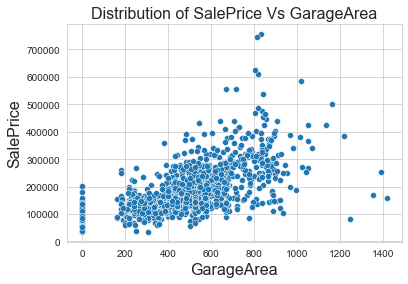

In [16]:
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = housing)
plt.title("Distribution of SalePrice Vs GarageArea", fontsize=16)
plt.xlabel("GarageArea", fontsize=16)
plt.ylabel("SalePrice", fontsize=16)

Text(0, 0.5, 'SalePrice')

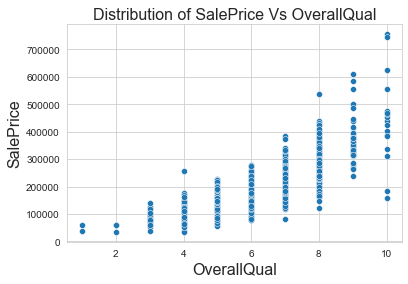

In [17]:
sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data = housing)
plt.title("Distribution of SalePrice Vs OverallQual", fontsize=16)
plt.xlabel("OverallQual", fontsize=16)
plt.ylabel("SalePrice", fontsize=16)

Text(0, 0.5, 'SalePrice')

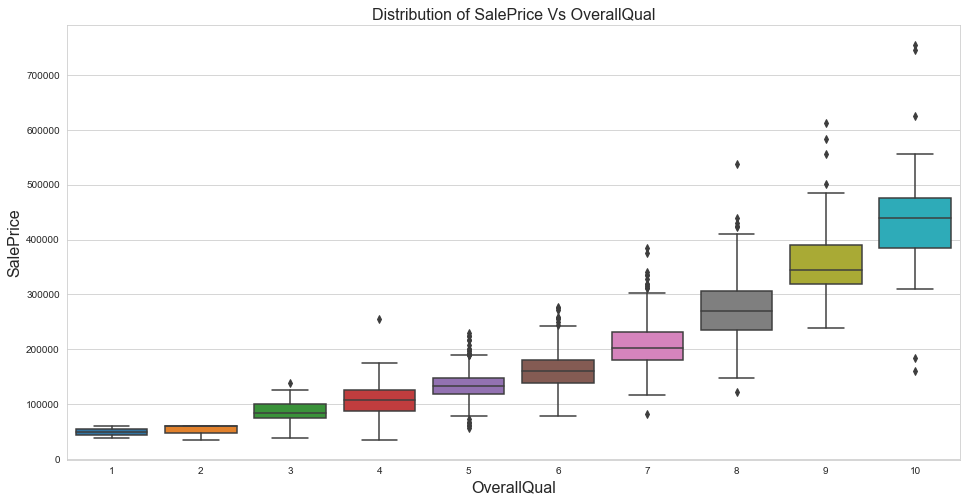

In [18]:
plt.subplots(figsize=(16, 8))
sns.boxplot('OverallQual', 'SalePrice', data = housing)
plt.title("Distribution of SalePrice Vs OverallQual", fontsize=16)
plt.xlabel("OverallQual", fontsize=16)
plt.ylabel("SalePrice", fontsize=16)

* Everything seems fine for this one, except that when you look to the right things start getting much more nuanced.

Text(0, 0.5, 'SalePrice')

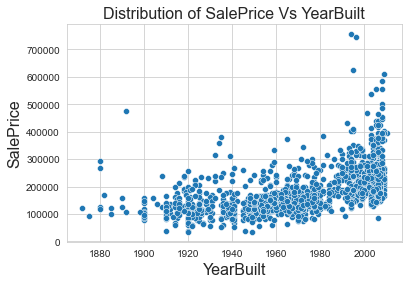

In [19]:
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = housing)
plt.title("Distribution of SalePrice Vs YearBuilt", fontsize=16)
plt.xlabel("YearBuilt", fontsize=16)
plt.ylabel("SalePrice", fontsize=16)

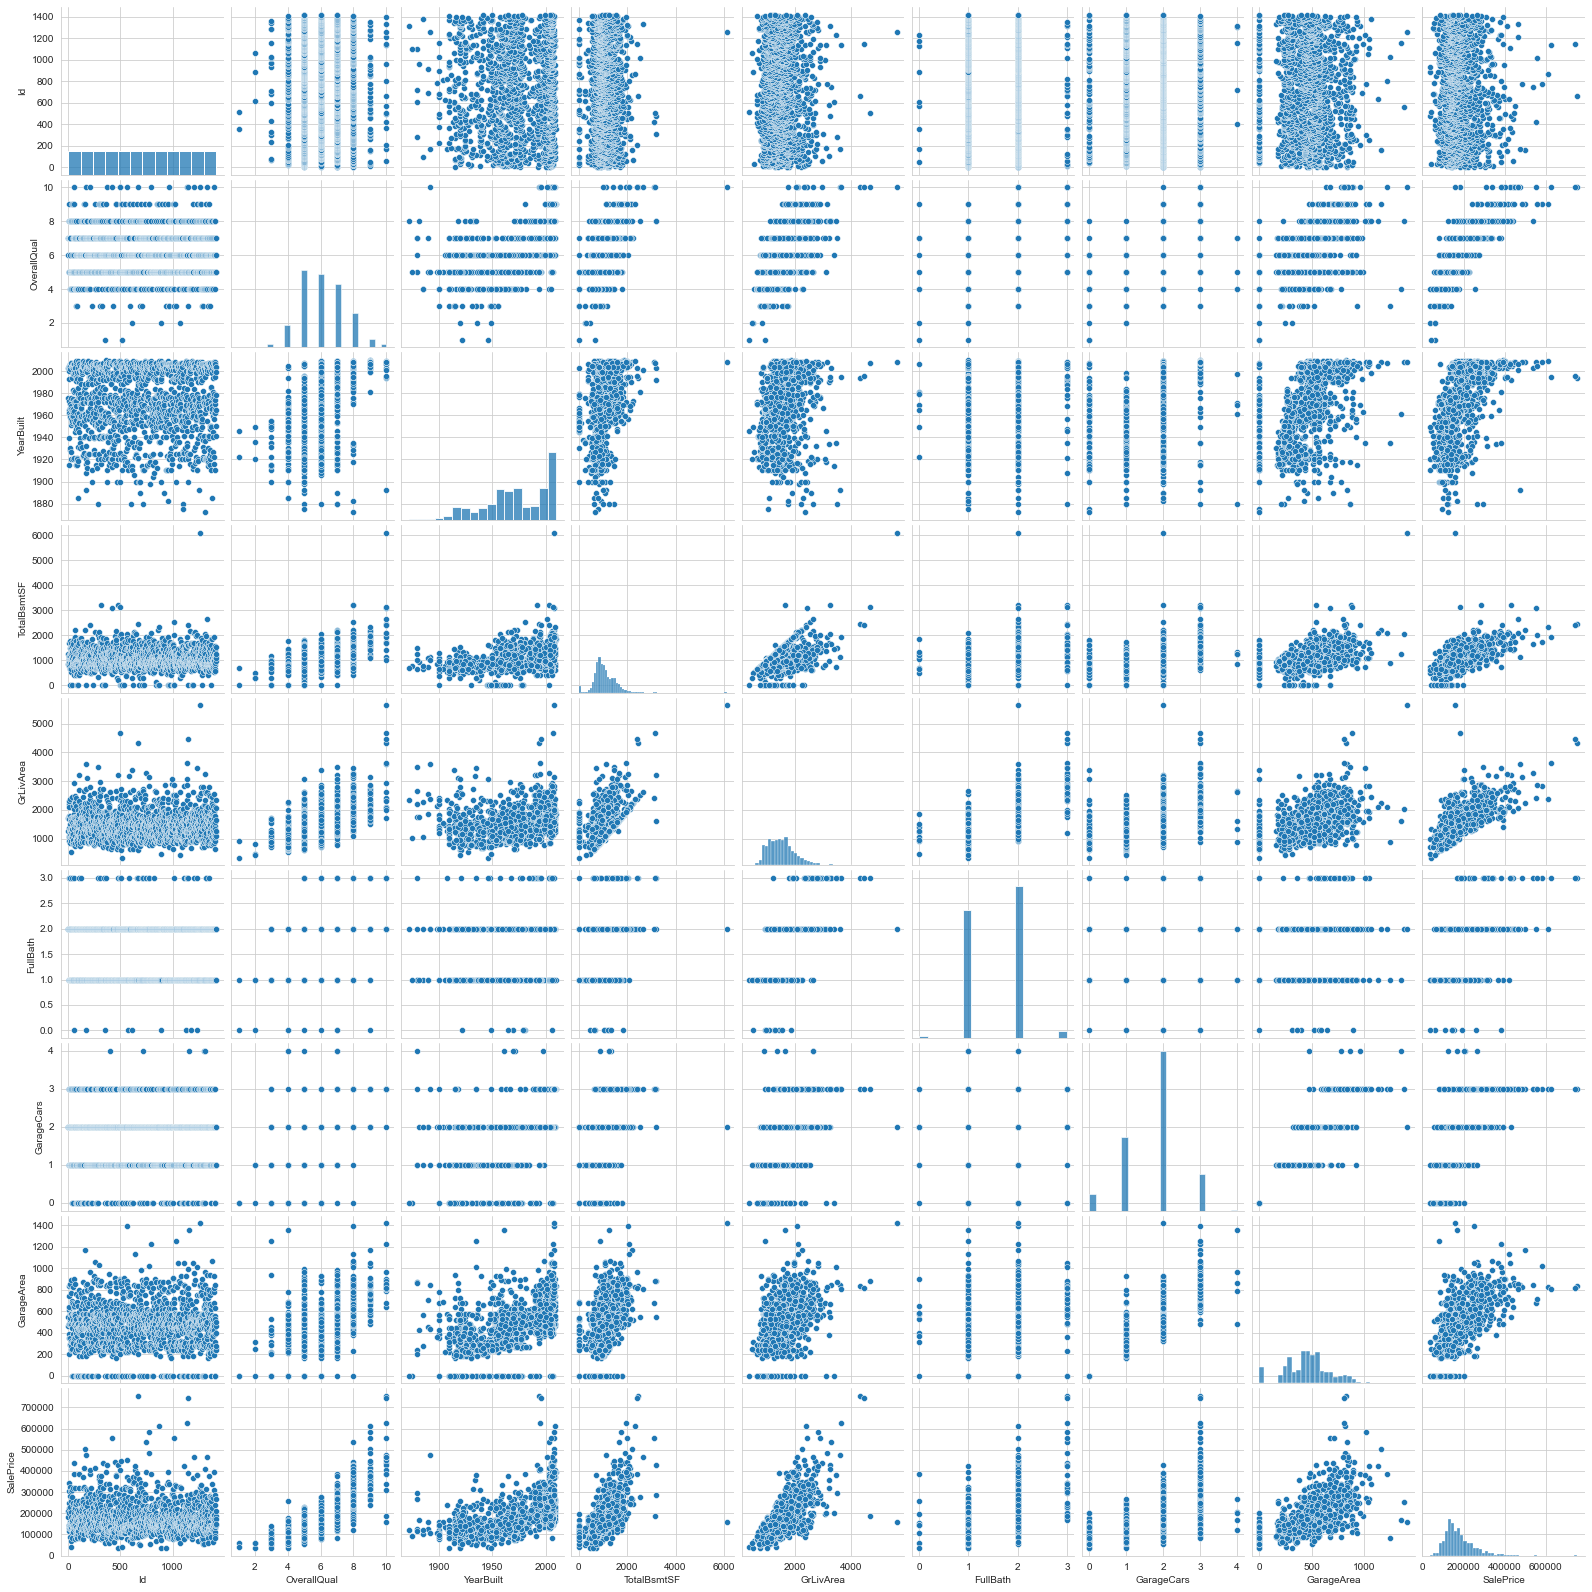

In [20]:
sns.pairplot(housing)

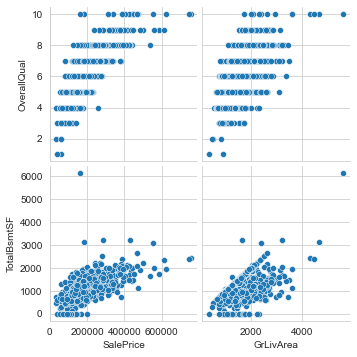

In [21]:
sns.pairplot(data = housing,x_vars = ["SalePrice", "GrLivArea"],y_vars = ["OverallQual", "TotalBsmtSF"])

## Correlation matrix 

<AxesSubplot:>

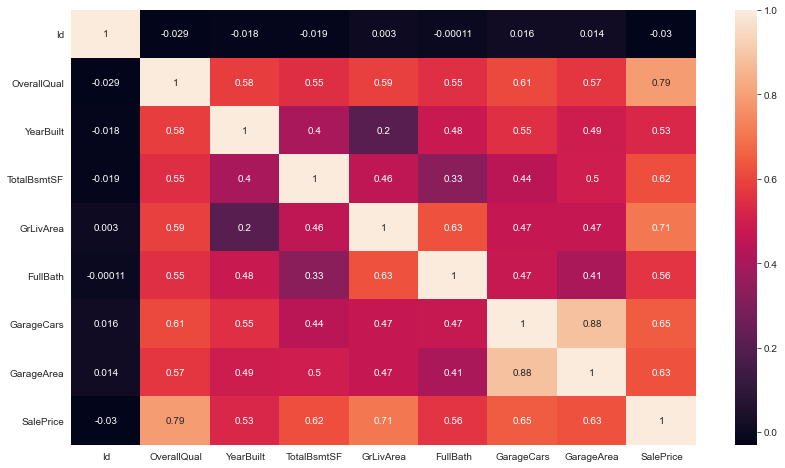

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(housing.corr(),annot=True)

## Treating the Missing Values

#### Deleting the ' MiscFeature ' & ' Fence ' Columns 

In [23]:
housing.drop(columns=['MiscFeature', 'Fence'],inplace=True)

### Handle missing value of " Electrical "

In [24]:
# See that row where value for 'Electrical' column is null

housing[housing['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500


In [25]:
# Lets make a new data frame of a few rows (hard-copy)

df_electrical_missing = housing.iloc[1337:1342].copy()

In [26]:
df_electrical_missing

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1337,1338,5,1941,984,SBrkr,1604,2,Detchd,2,660,117000
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500
1341,1342,6,1970,1205,SBrkr,2117,2,Attchd,2,550,237500


In [27]:
# Use last valid observation to fill gap
df_electrical_missing['Electrical'].fillna(method='ffill')

1337    SBrkr
1338    SBrkr
1339    SBrkr
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [28]:
# Use next valid observation to fill gap 
df_electrical_missing['Electrical'].fillna(method='backfill')

1337    SBrkr
1338    SBrkr
1339    FuseF
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [29]:
# Location based replacement
df_electrical_missing.loc[1339,'Electrical'] = 'SBrkr'
df_electrical_missing

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1337,1338,5,1941,984,SBrkr,1604,2,Detchd,2,660,117000
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000
1339,1340,5,2006,384,SBrkr,1394,2,BuiltIn,2,400,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500
1341,1342,6,1970,1205,SBrkr,2117,2,Attchd,2,550,237500


In [30]:
## Lets drop the rows with missing value in 'Electrical' column
housing.dropna(subset=['Electrical'], inplace=True)

#### Handle missing values of " GarageType "

In [31]:
## Lets see those rows where the 'GarageType' is null

housing[housing['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,170000
...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,84500


In [32]:
housing.groupby(['GarageType','GarageCars'])['GarageCars'].count()

GarageType  GarageCars
2Types      2               1
            3               4
            4               1
Attchd      1             105
            2             556
            3             138
            4               1
Basment     1               8
            2              11
BuiltIn     1               8
            2              48
            3              30
CarPort     1               3
            2               6
Detchd      1             178
            2             164
            3               9
            4               3
Name: GarageCars, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

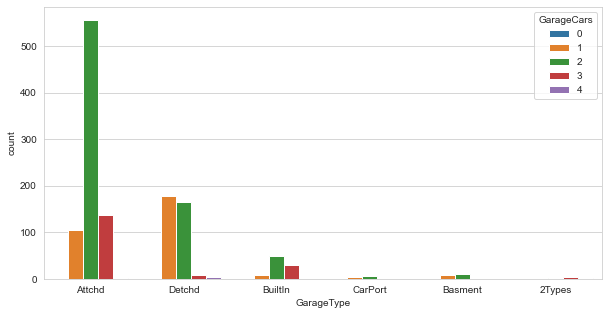

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'GarageType', hue = 'GarageCars', data = housing)

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

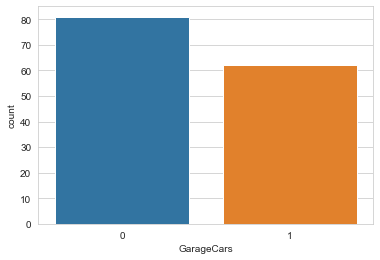

In [34]:
sns.countplot(x = 'GarageCars', data = housing[housing['GarageType'].isnull()])

In [35]:
housing[housing['GarageCars'] == 0]['GarageArea'].value_counts()

0    81
Name: GarageArea, dtype: int64

In [36]:
housing['GarageType'] = np.where(housing['GarageCars'] == 1 & housing['GarageType'].isnull(),'Detchd', housing['GarageType'])
housing['GarageType'] = np.where(housing['GarageCars'] == 0 & housing['GarageType'].isnull(),'NoGarage', housing['GarageType'])

# Outliers detection and treatment

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

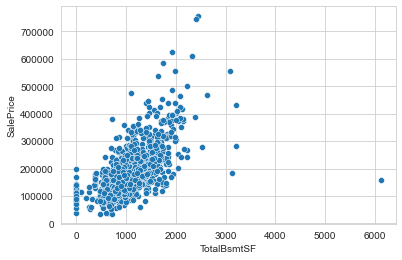

In [37]:
# Bivariate analysis between 'TotalBsmtSF' and 'SalePrice'

sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing)

In [38]:
## Lets sort the data by "TotalBsmtSF" in the descending order

housing.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000
313,314,8,2003,3206,SBrkr,1629,2,Attchd,3,880,284000


In [39]:
housing.drop(housing[housing['Id'] == 1261].index, inplace=True)

In [40]:
housing.sort_values(by = 'TotalBsmtSF', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
313,314,8,2003,3206,SBrkr,1629,2,Attchd,3,880,284000
475,476,8,1992,3200,SBrkr,3228,3,Attchd,2,546,430000


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

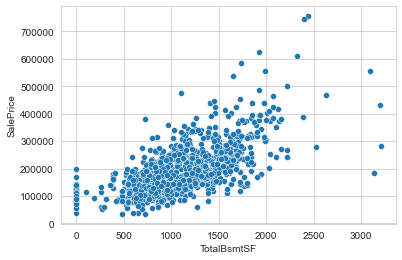

In [41]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=housing)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

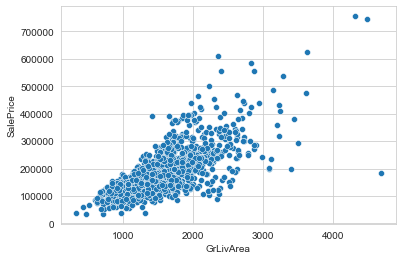

In [42]:
# Bivariate analysis between 'GrLivArea' and 'SalePrice'

sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing)

In [43]:
housing.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [44]:
a = housing[(housing['GrLivArea'] > 4000) & (housing['SalePrice'] < 300000)]
housing.drop(a.index, inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

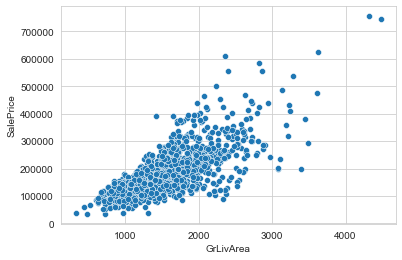

In [45]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=housing)

<AxesSubplot:xlabel='GrLivArea'>

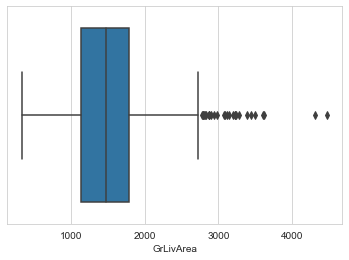

In [46]:
sns.boxplot(housing['GrLivArea'])

<AxesSubplot:xlabel='TotalBsmtSF'>

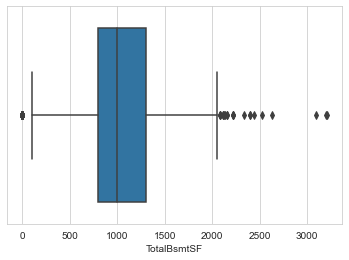

In [47]:
sns.boxplot(housing['TotalBsmtSF'])

In [48]:
Q1 = housing.quantile(0.25)    ## Returns a series of 1st quartile values  
Q3 = housing.quantile(0.75)    ## Returns a series of 3rd quartile values 
IQR = Q3 - Q1
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [49]:
box_plot_val_df = pd.concat([LL,Q1, Q3,UL], axis=1, keys=['LL','Q1', 'Q3','UL'])

box_plot_val_df.head(20)

,LL,Q1,Q3,UL
Id,-707.50,354.5,1062.5,2124.50
OverallQual,2.00,5.0,7.0,10.00
YearBuilt,1883.50,1954.0,2001.0,2071.50
TotalBsmtSF,39.50,797.0,1302.0,2059.50
GrLivArea,151.25,1131.5,1785.0,2765.25
FullBath,-0.50,1.0,2.0,3.50
GarageCars,-0.50,1.0,2.0,3.50
GarageArea,-56.50,323.0,576.0,955.50
SalePrice,2500.00,130000.0,215000.0,342500.00


### Lets handle the 'TotalBsmtSF' variable

<AxesSubplot:xlabel='TotalBsmtSF'>

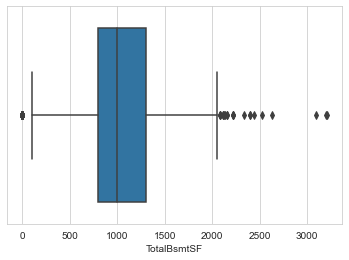

In [50]:
sns.boxplot(housing['TotalBsmtSF'])

In [51]:
box_plot_val_df.head(20)

,LL,Q1,Q3,UL
Id,-707.50,354.5,1062.5,2124.50
OverallQual,2.00,5.0,7.0,10.00
YearBuilt,1883.50,1954.0,2001.0,2071.50
TotalBsmtSF,39.50,797.0,1302.0,2059.50
GrLivArea,151.25,1131.5,1785.0,2765.25
FullBath,-0.50,1.0,2.0,3.50
GarageCars,-0.50,1.0,2.0,3.50
GarageArea,-56.50,323.0,576.0,955.50
SalePrice,2500.00,130000.0,215000.0,342500.00


In [52]:
# Drop those rows where 'TotalBsmtSF' > 3000

housing.drop(housing[housing['TotalBsmtSF']>3000].index, inplace=True)

In [53]:
housing[housing['TotalBsmtSF']>3000].shape[0]

0

<AxesSubplot:xlabel='TotalBsmtSF'>

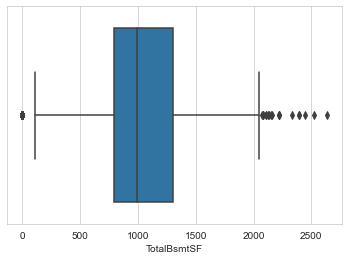

In [54]:
sns.boxplot(housing['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF'>

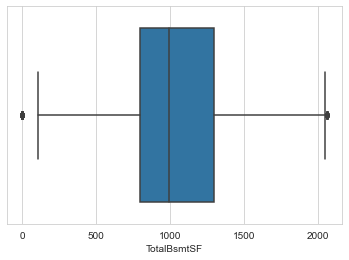

In [55]:
# Cap the outliers on the right side to value of UL
housing['TotalBsmtSF'] = np.where(housing['TotalBsmtSF'] > 2059.50, 2059.50,housing['TotalBsmtSF'])
sns.boxplot(housing['TotalBsmtSF'])

In [56]:
# Floor the outliers on the left side to value of LL

housing['TotalBsmtSF'] = np.where(housing['TotalBsmtSF'] < 39.50, 39.50,housing['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF'>

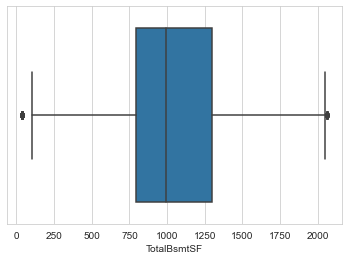

In [57]:
sns.boxplot(housing['TotalBsmtSF'])

##### This seems to be satisfactory enough.
##### So we can easily go ahead with it to keep it real. 

### Lets handle the 'GrLivArea' variable

Lets use the 3 standard deviation way of handling the outliers

<AxesSubplot:xlabel='GrLivArea'>

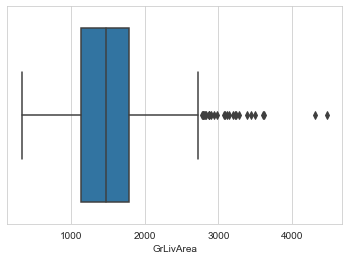

In [58]:
sns.boxplot(housing['GrLivArea'])

In [59]:
upper_limit = housing['GrLivArea'].mean() + 3*housing['GrLivArea'].std()
upper_limit

3035.160135701378

In [60]:
lower_limit = housing['GrLivArea'].mean() - 3*housing['GrLivArea'].std()
lower_limit

-9.825858080981334

In [61]:
# Lets drop those rows
housing.drop(housing[housing['GrLivArea']>upper_limit].index, inplace=True)
housing.drop(housing[housing['GrLivArea']<lower_limit].index, inplace=True)

<AxesSubplot:xlabel='GrLivArea'>

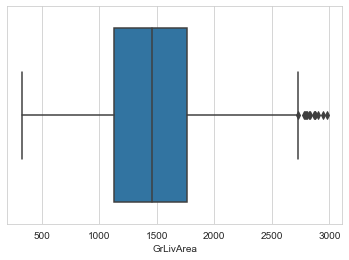

In [62]:
sns.boxplot(housing['GrLivArea'])

### Lets handle the 'GarageArea' variable

Lets use the z score method of handling the outliers

<AxesSubplot:xlabel='GarageArea'>

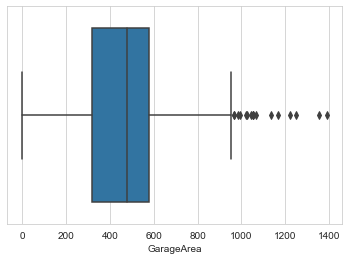

In [63]:
sns.boxplot(housing['GarageArea'])

In [64]:
# Add a new column in dataframe

housing['z_score_GarageArea'] = (housing['GarageArea'] - housing['GarageArea'].mean()) / housing['GarageArea'].std()

In [65]:
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,z_score_GarageArea
0,1,7,2003,856.0,SBrkr,1710,2,Attchd,2,548,208500,0.371064
1,2,6,1976,1262.0,SBrkr,1262,2,Attchd,2,460,181500,-0.043155
2,3,7,2001,920.0,SBrkr,1786,2,Attchd,2,608,223500,0.653486
3,4,7,1915,756.0,SBrkr,1717,1,Detchd,3,642,140000,0.813525
4,5,8,2000,1145.0,SBrkr,2198,2,Attchd,3,836,250000,1.726689


### Lets try capping

In [66]:
# Lets try capping

upper_limit = housing['GarageArea'].mean() + 3*housing['GarageArea'].std()
upper_limit

1106.512380942947

In [67]:
lower_limit = housing['GarageArea'].mean() - 3*housing['GarageArea'].std()
lower_limit

-168.17594572462207

In [68]:
housing['GarageArea'] = np.where(housing['z_score_GarageArea'] > 3, upper_limit, housing['GarageArea'])
housing['GarageArea'] = np.where(housing['z_score_GarageArea'] < -3, lower_limit, housing['GarageArea'])

<AxesSubplot:xlabel='GarageArea'>

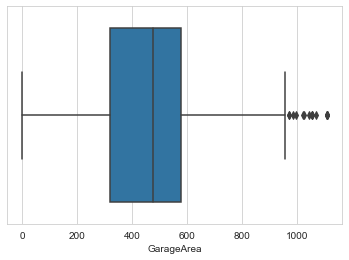

In [69]:
sns.boxplot(housing['GarageArea'])

In [70]:
housing.drop(columns='z_score_GarageArea',inplace=True)

In [71]:
housing.isnull().sum()

Id             0
OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

* Now there is no missing values.

## Regression

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

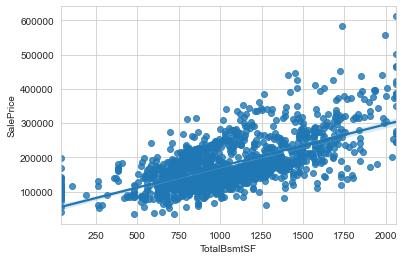

In [72]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = housing)

## Numerical Variable

In [73]:
numerical_cols = housing.select_dtypes(include=np.number)

In [74]:
numerical_cols

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,1,7,2003,856.0,1710,2,2,548.0,208500
1,2,6,1976,1262.0,1262,2,2,460.0,181500
2,3,7,2001,920.0,1786,2,2,608.0,223500
3,4,7,1915,756.0,1717,1,3,642.0,140000
4,5,8,2000,1145.0,2198,2,3,836.0,250000
...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953.0,1647,2,2,460.0,175000
1414,1415,6,1978,1542.0,2073,2,2,500.0,210000
1415,1416,7,1941,1152.0,2340,2,1,252.0,266500
1416,1417,5,1950,1078.0,1078,1,1,240.0,142125


In [75]:
## numrical columns

numerical_cols = housing.select_dtypes(include=np.number).columns

In [76]:
numerical_cols

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [77]:
Housingdata_num = housing[numerical_cols]
Housingdata_num

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,1,7,2003,856.0,1710,2,2,548.0,208500
1,2,6,1976,1262.0,1262,2,2,460.0,181500
2,3,7,2001,920.0,1786,2,2,608.0,223500
3,4,7,1915,756.0,1717,1,3,642.0,140000
4,5,8,2000,1145.0,2198,2,3,836.0,250000
...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953.0,1647,2,2,460.0,175000
1414,1415,6,1978,1542.0,2073,2,2,500.0,210000
1415,1416,7,1941,1152.0,2340,2,1,252.0,266500
1416,1417,5,1950,1078.0,1078,1,1,240.0,142125


## Categorical Variable

In [78]:
categorical_cols = housing.select_dtypes(include='object').columns

In [79]:
categorical_cols

Index(['Electrical', 'GarageType'], dtype='object')

## converting categorical into dummy variables

In [80]:
Housingdata_dummies = pd.get_dummies(housing[categorical_cols])

In [81]:
Housingdata_dummies

,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,0,0,0,0,1,0,1,0,0,0,0,0
1414,0,0,0,0,1,0,1,0,0,0,0,0
1415,0,0,0,0,1,0,1,0,0,0,0,0
1416,1,0,0,0,0,0,0,0,0,0,1,0


## Combining Numerical and Dummy Variables

In [82]:
houseData_combined = pd.concat([Housingdata_num,Housingdata_dummies],axis=1)

In [83]:
houseData_combined

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,Electrical_FuseA,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,1,7,2003,856.0,1710,2,2,548.0,208500,0,...,0,0,1,0,1,0,0,0,0,0
1,2,6,1976,1262.0,1262,2,2,460.0,181500,0,...,0,0,1,0,1,0,0,0,0,0
2,3,7,2001,920.0,1786,2,2,608.0,223500,0,...,0,0,1,0,1,0,0,0,0,0
3,4,7,1915,756.0,1717,1,3,642.0,140000,0,...,0,0,1,0,0,0,0,0,1,0
4,5,8,2000,1145.0,2198,2,3,836.0,250000,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953.0,1647,2,2,460.0,175000,0,...,0,0,1,0,1,0,0,0,0,0
1414,1415,6,1978,1542.0,2073,2,2,500.0,210000,0,...,0,0,1,0,1,0,0,0,0,0
1415,1416,7,1941,1152.0,2340,2,1,252.0,266500,0,...,0,0,1,0,1,0,0,0,0,0
1416,1417,5,1950,1078.0,1078,1,1,240.0,142125,1,...,0,0,0,0,0,0,0,0,1,0


## splitting data into independent & dependent variables

In [84]:
## Independent variables
X = houseData_combined.drop(columns=['Id','SalePrice'])

## dependent variables
Y = houseData_combined['SalePrice']

## splitting the data into trainning & test data

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train , X_test , Y_train , Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 100)

In [87]:
x_train

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
1412,7,2004,1221.0,1221,2,2,400.0,0,0,0,0,1,0,1,0,0,0,0,0
802,6,1957,1392.0,1392,1,2,458.0,1,0,0,0,0,0,1,0,0,0,0,0
333,5,1941,616.0,1111,1,1,200.0,0,0,0,0,1,0,0,0,0,0,1,0
1255,5,1892,994.0,2372,2,1,432.0,0,0,0,0,1,0,0,0,0,0,1,0
990,7,2005,1346.0,1504,2,2,437.0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,5,1915,876.0,1416,1,3,720.0,0,0,0,0,1,0,0,0,0,0,1,0
53,8,1999,970.0,1739,2,2,480.0,0,0,0,0,1,0,1,0,0,0,0,0
355,7,2003,847.0,1928,2,2,434.0,0,0,0,0,1,0,0,0,1,0,0,0
79,3,1915,1013.0,1526,1,0,0.0,0,0,0,0,1,0,0,0,0,0,0,1


## perform Linear Regresssion

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model = LinearRegression()

In [90]:
model.fit(x_train,Y_train)

LinearRegression()

## Model Evaluation

In [91]:
# Intercept

print(model.intercept_)

-722114.2147892659


In [92]:
# coefficients

coefficients = pd.DataFrame(model.coef_,x_train.columns,columns=['coefficients'])
coefficients

,coefficients
OverallQual,1.753586e+04
YearBuilt,3.266796e+02
TotalBsmtSF,4.467458e+01
GrLivArea,5.362676e+01
FullBath,-1.036728e+04
GarageCars,5.454358e+03
GarageArea,5.249221e+01
Electrical_FuseA,8.081388e+02
Electrical_FuseF,5.071634e+03
Electrical_FuseP,-7.315257e+03


* From the above result we may infern that if OverallQual increses by 1 unit it will affect SalePrice by 1.753586e+04 units.

## Making Predictions

In [93]:
Y_pred = model.predict(X_test)

In [94]:
Y_test

529     255500
833     132500
736     337000
194     156000
486     208300
         ...  
24      134800
406     109008
1359    120000
157     239000
550     170000
Name: SalePrice, Length: 420, dtype: int64

In [95]:
Y_pred - Y_test

529     34170.328304
833     19275.505077
736    -38012.161555
194     -6152.879989
486    -19048.867142
            ...     
24      -9601.557949
406    -15909.839788
1359    21587.365494
157    -25867.412441
550     10715.081955
Name: SalePrice, Length: 420, dtype: float64

Text(0.5, 0, 'SalePrice')

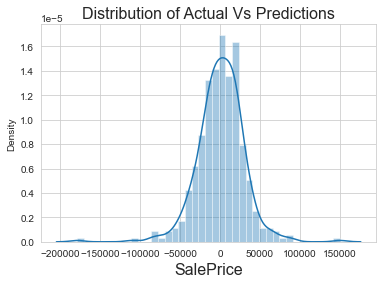

In [96]:
sns.distplot(Y_pred - Y_test)
plt.title("Distribution of Actual Vs Predictions", fontsize=16)
plt.xlabel("SalePrice", fontsize=16)

Text(0, 0.5, 'SalePrice')

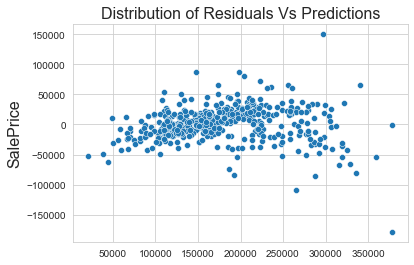

In [97]:
sns.scatterplot(x = Y_pred , y = Y_pred - Y_test)
plt.title("Distribution of Residuals Vs Predictions", fontsize=16)
plt.ylabel("SalePrice", fontsize=16) 

### Line plots of residuals 

In [98]:
list_values = [i for i in range(0,len(Y_test))]

Text(0.5, 1.0, 'Actual(Blue) vs. predicted (red)')

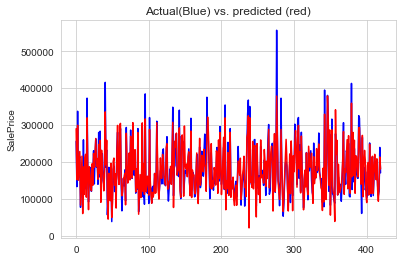

In [99]:
sns.lineplot(list_values,Y_test, color = 'blue')
sns.lineplot(list_values,Y_pred, color = 'red')
plt.title('Actual(Blue) vs. predicted (red)')
          
## error = test - pred

In [100]:
from sklearn import metrics

In [101]:
r_square = metrics.r2_score(Y_test,Y_pred)

print(r_square)

0.8340323699230325


* R Square is 83.40%

In [102]:
mean_square = metrics.mean_squared_error(Y_test,Y_pred)

print(mean_square)

840629362.9699367


* Mean Square Error (MSE) = 840629362.9699367

In [103]:
r_mean_squared_error = np.sqrt(mean_square)

print(r_mean_squared_error)

28993.60900215661


* Root Mean Squared Error (RRMSE) = 28993.60900215661

* If the value of R2 is 0.8340 then this suggests that 83.40% of the variation in Y can be explained with the help of given explanatory variables in that model. 

* In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.


* On addition of a new variable the error is sure to decrease, thus R square always increases whenever a new variable is added to our model. This may not describe the importance of a variable

## Adujusted R square

In [104]:
## Adj r2 = 1 - ((n-1)/(n-k-1))*(1- r square)

In [105]:
# n = sample size

n = X_test.shape[0]
n

420

In [106]:
# k = no of independent variables

k = X_test.shape[1]
k

19

In [107]:
Adj_r2 = 1 - ((n-1)/(n-k-1))*(1- r_square)

In [108]:
Adj_r2

0.8261489074943765

* Adj. R-squared = 82.61%

* Hence adjusted R square will always be less than or equal to R square.


* Thus as a general thumb rule if adjusted R square increases when a new variable is added to the model, the variable should remain in the model.



* If the adjusted R square decreases when the new variable is added then the variable should not remain in the model.

## Checking for P-value Using STATSMODELS

In [109]:
import statsmodels.api as sm

In [110]:
x_train_sm = sm.add_constant(x_train)

In [111]:
stats_model = sm.OLS(Y_train,x_train_sm).fit()

In [112]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     269.2
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:03:51   Log-Likelihood:                -11514.
No. Observations:                 977   AIC:                         2.306e+04
Df Residuals:                     960   BIC:                         2.314e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.184e+05   7.84e+04     -6.609      0.000   -6.72e+05   -3.65e+05
OverallQual          1.754e+04   1212.236     14.466      0.000    1.52e+04    1.99e+04
YearBuilt             326.6796     57.127      5.718      0.000     214.572     438.788
TotalBsmtSF            44.6746      3.462     12.903      0.000      37.880      51.469
GrLivArea              53.6268      3.435     15.610      0.000      46.885      60.369
FullBath            -1.037e+04   2772.616     -3.739      0.000   -1.58e+04   -4926.196
GarageCars           5454.3575   3348.619      1.629      0.104   -1117.100     1.2e+04
GarageArea             52.4922     11.013      4.766      0.000      30.879      74.106
Electrical_FuseA    -1.288e+05   2.02e+04     -6.366      0.000   -1.69e+05   -8.91e+04
Electrical_FuseF    -1.245e+05   2.09e+04     -5.972      0.000   -1.65e+05   -8.36e+04
Electrical_FuseP    -1.369e+05   2.41e+04     -5.684      0.000   -1.84e+05   -8.97e+04
Electrical_Mix       2.507e-11   1.03e-11      2.437      0.015    4.88e-12    4.53e-11
Electrical_SBrkr    -1.282e+05   2.07e+04     -6.188      0.000   -1.69e+05   -8.75e+04
GarageType_2Types   -1.103e+05   1.68e+04     -6.586      0.000   -1.43e+05   -7.75e+04
GarageType_Attchd   -7.104e+04   1.22e+04     -5.800      0.000   -9.51e+04    -4.7e+04
GarageType_Basment  -7.472e+04   1.38e+04     -5.429      0.000   -1.02e+05   -4.77e+04
GarageType_BuiltIn  -5.379e+04   1.36e+04     -3.964      0.000   -8.04e+04   -2.72e+04
GarageType_CarPort  -8.667e+04   1.66e+04     -5.229      0.000   -1.19e+05   -5.41e+04
GarageType_Detchd   -7.247e+04   1.11e+04     -6.515      0.000   -9.43e+04   -5.06e+04
GarageType_NoGarage -4.941e+04   1.27e+04     -3.890      0.000   -7.43e+04   -2.45e+04
==============================================================================
Omnibus:                      324.976   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2611.288
Skew:                           1.293   Prob(JB):                         0.00
Kurtosis:                      10.580   Cond. No.                     3.90e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.9e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

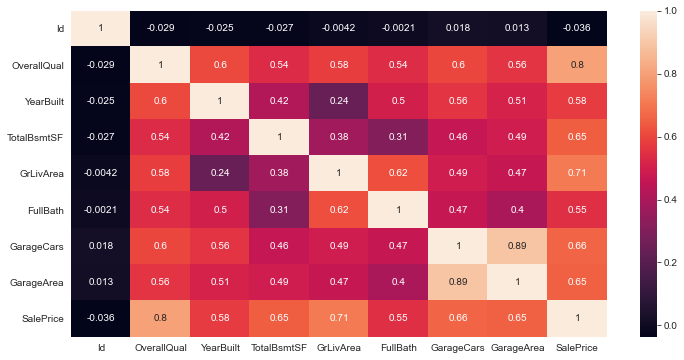

In [113]:
plt.figure(figsize = (12,6))
sns.heatmap(Housingdata_num.corr(),annot = True)

## Implementing the results

Text(0, 0.5, 'SalePrice')

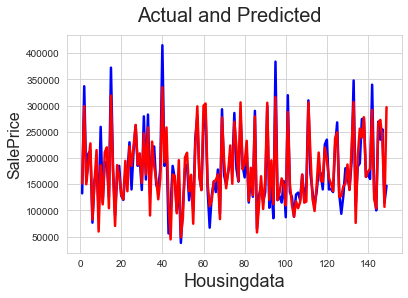

In [114]:
#Actual vs Predicted
# Check for the forst 150 observations

c = [i for i in range(1,150,1)]
fig = plt.figure()
plt.plot(c,Y_test[1:150], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred[1:150], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Housingdata', fontsize=18)                               # X-label
plt.ylabel('SalePrice', fontsize=16)                               # Y-label

Text(0, 0.5, 'Actual - Predicted')

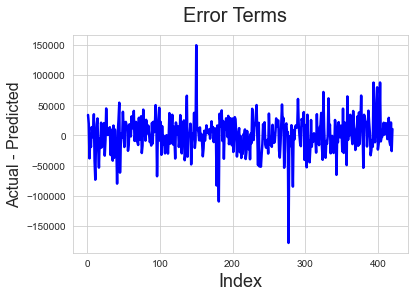

In [115]:
# Error terms

c = [i for i in range(1,421,1)]
fig = plt.figure()
plt.plot(c,Y_pred - Y_test, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual - Predicted', fontsize=16)                # Y-label


## Variance Inflation Factor

* Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2 ).




* Here, we take that particular X as response variable and all other explanatory variables as independent variables. So, we run a regression between one of those explanatory variables with remaining explanatory variables.

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [118]:
vif.round(2)

,VIF Factor,features
0,2.62,OverallQual
1,2.74,YearBuilt
2,1.70,TotalBsmtSF
3,2.52,GrLivArea
4,2.14,FullBath
5,6.13,GarageCars
6,5.28,GarageArea
7,inf,Electrical_FuseA
8,inf,Electrical_FuseF
9,inf,Electrical_FuseP


###  Variance Inflation Factor

#### Please read more about VIF and the cut off of Variance

#### The thumb rule is VIF greater than 10 should be removed.